In [ ]:
import torch
import torchvision
from torchvision.models.detection import maskrcnn_resnet50_fpn
import torchvision.transforms as T
from PIL import Image
import matplotlib.pyplot as plt


**Load and Display the Image**

In [ ]:
# Import statements for various pre-trained segmentation models

# PyTorch and torchvision
import torch
import torchvision.transforms as T
from torchvision.models.detection import maskrcnn_resnet50_fpn
from torchvision.models.segmentation import deeplabv3_resnet101
from PIL import Image

import matplotlib.pyplot as plt

# YOLOv5
import torch

import cv2

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Image found!


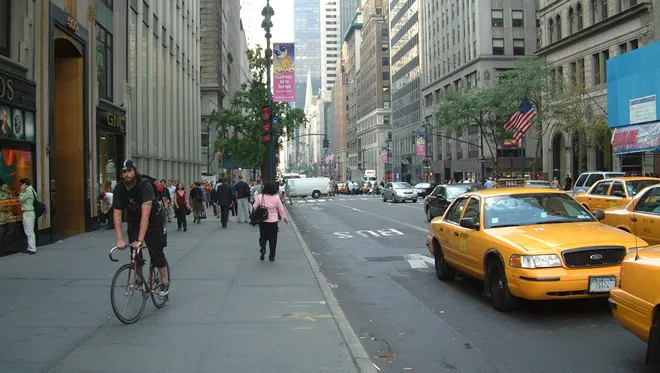

In [ ]:
from google.colab import drive
import cv2
import os

# Mount Google Drive
drive.mount('/content/drive')

# Image path in Google Drive
img_path = '/content/drive/MyDrive/image.jpg'

# Check if the image exists
if os.path.exists(img_path):
    print("Image found!")
else:
    print("Image not found!")

# Load the image using OpenCV
img = cv2.imread(img_path)

# Display the image
from google.colab.patches import cv2_imshow
cv2_imshow(img)


In [ ]:
from google.colab import files
uploaded = files.upload()

img_path = list(uploaded.keys())[0]

Saving image.jpg to image (3).jpg


**Load Pre-trained Models**

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MaskRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=MaskRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Image found!


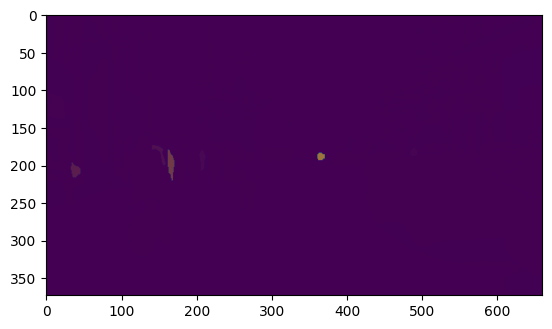

In [ ]:

!pip install torch torchvision matplotlib Pillow opencv-python-headless
import torch
import torchvision.transforms as T
from torchvision.models.detection import maskrcnn_resnet50_fpn
from torchvision.models.segmentation import deeplabv3_resnet101
import matplotlib.pyplot as plt
from PIL import Image
import cv2
import numpy as np
import os
from google.colab import drive
from google.colab.patches import cv2_imshow

# Function to get the image from Google Drive
def get_image_from_drive(img_path):
    # Mount Google Drive
    drive.mount('/content/drive')

    # Check if the image exists
    if os.path.exists(img_path):
        print("Image found!")
        try:
            # Load the image using PIL directly
            img = Image.open(img_path).convert('RGB')
            img.show()  # Display the image to ensure it's loaded correctly
            return img
        except Exception as e:
            print(f"Error loading image: {e}")
            return None
    else:
        print("Image not found!")
        return None

# Define functions
def get_maskrcnn_model():
    model = maskrcnn_resnet50_fpn(pretrained=True)
    model.eval()
    return model



def get_maskrcnn_prediction(img, model, threshold=0.5):
    transform = T.Compose([T.ToTensor()])
    img_tensor = transform(img).unsqueeze(0)
    with torch.no_grad():
        pred = model(img_tensor)
        pred_score = list(pred[0]['scores'].detach().numpy())
        pred_t = [pred_score.index(x) for x in pred_score if x > threshold]
        masks = (pred[0]['masks'] > 0.5).squeeze().detach().cpu().numpy()
    masks = masks[:len(pred_t)]
    return masks, pred[0]['labels'], pred[0]['boxes']



def plot_maskrcnn_segmented_image(img, masks):
    plt.imshow(img)
    for mask in masks:
        plt.imshow(mask, alpha=0.5)
    plt.show()


# Load models
maskrcnn_model = get_maskrcnn_model()

# Get image from Google Drive
img_path = '/content/drive/MyDrive/image.jpg'
img = get_image_from_drive(img_path)

if img is not None:
    # Get predictions
    maskrcnn_masks, _, _ = get_maskrcnn_prediction(img, maskrcnn_model)

    # Plot results
    plot_maskrcnn_segmented_image(img, maskrcnn_masks)


In [ ]:

!pip install torch torchvision matplotlib opencv-python-headless tensorflow


In [ ]:
import cv2
import numpy as np
import torch
import torchvision.transforms as T
from torchvision.models.detection import maskrcnn_resnet50_fpn
from torchvision.models.segmentation import deeplabv3_resnet101
from PIL import Image
import matplotlib.pyplot as plt



In [ ]:
def get_maskrcnn_model():
    model = maskrcnn_resnet50_fpn(pretrained=True)
    model.eval()
    return model

def get_deeplabv3_model():
    model = deeplabv3_resnet101(pretrained=True)
    model.eval()
    return model

def get_yolov5_model():
    model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)
    model.eval()
    return model


In [ ]:
def load_image(img_path):
    img = Image.open(img_path).convert("RGB")
    return img

def preprocess_image(img, model_type):
    transform = T.Compose([T.ToTensor()])
    img_tensor = transform(img).unsqueeze(0)
    return img_tensor


In [ ]:
def get_maskrcnn_prediction(img, model):
    img_tensor = preprocess_image(img, 'maskrcnn')
    with torch.no_grad():
        prediction = model(img_tensor)
    masks = prediction[0]['masks'].detach().numpy()
    return masks

def get_deeplabv3_prediction(img, model):
    img_tensor = preprocess_image(img, 'deeplabv3')
    with torch.no_grad():
        output = model(img_tensor)['out'][0]
    output_predictions = output.argmax(0).cpu().numpy()
    return output_predictions

def get_yolov5_prediction(img_path, model):
    results = model(img_path)
    return results.pandas().xyxy[0]


In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

# Ensure plots are displayed inline
%matplotlib inline

def plot_maskrcnn_results(img, masks):
    plt.figure(figsize=(10, 10))
    plt.imshow(img)
    for mask in masks:
        plt.imshow(mask[0], alpha=0.5)
    plt.axis('off')
    plt.show()

def plot_deeplabv3_results(img, output_predictions):
    plt.figure(figsize=(10, 10))
    plt.imshow(img)
    plt.imshow(output_predictions, alpha=0.5, cmap='jet')
    plt.axis('off')
    plt.show()

def plot_yolov5_results(img_path, results):
    img = Image.open(img_path).convert("RGB")
    plt.figure(figsize=(10, 10))
    plt.imshow(img)
    for index, row in results.iterrows():
        box = row[['xmin', 'ymin', 'xmax', 'ymax']].values
        plt.gca().add_patch(plt.Rectangle((box[0], box[1]), box[2]-box[0], box[3]-box[1], edgecolor='r', facecolor='none'))
    plt.axis('off')
    plt.show()

    # Use display to ensure the plot is shown
    from IPython.display import display
    display(plt.gcf())


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MaskRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=MaskRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DeepLabV3_ResNet101_Weights.COCO_WITH_VOC_LABELS_V1`. You can also use `weights=DeepLabV3_ResNet

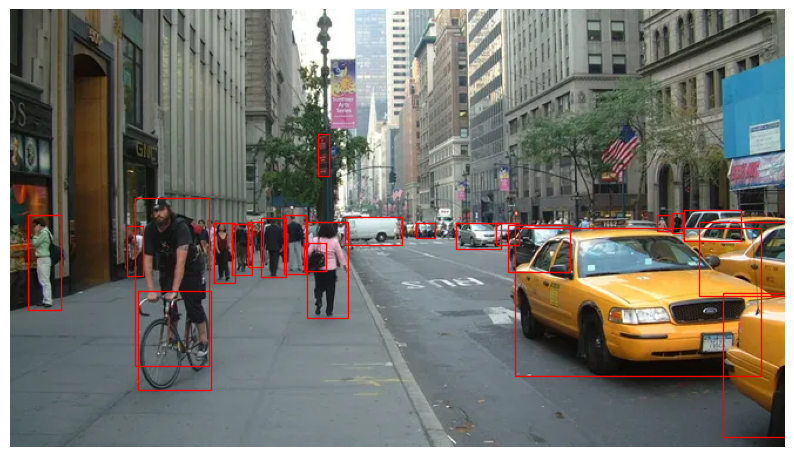

In [ ]:
# Define paths


# Load models
maskrcnn_model = get_maskrcnn_model()
deeplabv3_model = get_deeplabv3_model()
yolov5_model = get_yolov5_model()



# Get predictions
maskrcnn_masks = get_maskrcnn_prediction(img, maskrcnn_model)
deeplabv3_output = get_deeplabv3_prediction(img, deeplabv3_model)
yolov5_results = get_yolov5_prediction(img_path, yolov5_model)

# Plot results
plot_maskrcnn_results(img, maskrcnn_masks)
plot_deeplabv3_results(img, deeplabv3_output)
plot_yolov5_results(img_path, yolov5_results)


In [ ]:
import os

# List files in the /content directory
uploaded_files = os.listdir('/content/')
print(uploaded_files)

['.config', 'app.py', 'package-lock.json', 'image (3).jpg', 'package.json', 'yolov5s.pt', 'node_modules', 'logs.txt', 'image.jpg', 'image (1).jpg', 'drive', 'image (2).jpg', 'sample_data']


Image loaded successfully with OpenCV!


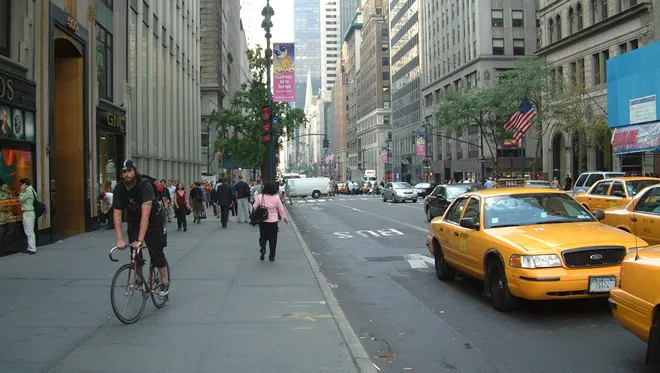

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

# Path to the uploaded image
img_path = '/content/image.jpg'  # Adjust this if user file name is different

# Load the image
img = cv2.imread(img_path)

# Checking if the image is loaded successfully
if img is not None:
    print("Image loaded successfully with OpenCV!")
    cv2_imshow(img)  # Display the image
else:
    print("Failed to load image with OpenCV.")


**Object Detection**

In [ ]:
import cv2
import numpy as np
import torch
from google.colab import drive
from google.colab.patches import cv2_imshow
from PIL import Image



# Load the YOLOv5 model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)
model.eval()



# Check if image is loaded correctly
if img is None:
    raise ValueError(f"Image not found or could not be loaded from path: {img_path}")

# Perform prediction
results = model(img)

print(f"Results type: {type(results)}")

# Convert results to a format suitable for display
if hasattr(results, 'pandas'):
    results_pandas = results.pandas().xyxy[0]  # Get predictions in a pandas DataFrame
    print(results_pandas)
else:
    print("Results object does not have 'pandas' method. Handling results differently.")
    print(results)

results.render()  # This modifies the image in-place

# Retrieveing  the rendered image
if hasattr(results, 'ims'):
    rendered_image = results.ims[0]  # Getting the first image with results rendered
else:
    results_df = results.pandas().xyxy[0]
    img_np = np.array(img)

    plt.figure(figsize=(10, 10))
    plt.imshow(img_np)

    for _, row in results_df.iterrows():
        xmin, ymin, xmax, ymax, conf, cls = row[['xmin', 'ymin', 'xmax', 'ymax', 'confidence', 'class']]
        plt.gca().add_patch(plt.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin, edgecolor='r', facecolor='none'))
        plt.text(xmin, ymin, f'{results.names[int(cls)]} {conf:.2f}', color='red', fontsize=12)

    plt.axis('off')
    plt.show()

# Optionally, save the result image if rendered_image is available
if hasattr(results, 'ims'):
    rendered_image = np.array(rendered_image)
    rendered_image = cv2.cvtColor(rendered_image, cv2.COLOR_RGB2BGR)
    result_save_path = '/content/drive/MyDrive/results/image_with_detections.jpg'
    cv2.imwrite(result_save_path, rendered_image)

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2024-8-19 Python-3.10.12 torch-2.3.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


Results type: <class 'models.common.Detections'>
          xmin        ymin        xmax        ymax  confidence  class     name
0   428.670929  185.391083  638.260498  312.338409    0.903965      2      car
1   108.516335  239.522858  170.939697  324.171265    0.875053      1  bicycle
2   252.633438  181.352631  286.897827  263.218597    0.852211      0   person
3   607.086914  240.354095  660.000000  362.873871    0.850026      2      car
4   104.640182  160.458542  169.990021  304.408173    0.839734      0   person
5   424.450287  183.450439  473.149200  220.302429    0.769516      2      car
6   577.866333  181.148087  659.668152  246.233871    0.763245      2      car
7    16.146719  175.169846   42.519634  254.410614    0.756457      0   person
8   213.895142  179.011108  234.174622  227.550797    0.714198      0   person
9   382.389709  182.350815  417.721466  203.558502    0.713493      2      car
10  233.539215  177.011063  251.024872  224.050735    0.687303      0   person
11 

In [ ]:
import os

# Define the output directory
output_dir = '/content/drive/MyDrive/detected_objects'
os.makedirs(output_dir, exist_ok=True)

In [ ]:
import cv2
import numpy as np
import torch
from google.colab import drive
from google.colab.patches import cv2_imshow
from PIL import Image
import matplotlib.pyplot as plt

# Load the YOLOv5 model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)
model.eval()

# Get image from Google Drive
def get_image_from_drive(img_path):
    # Mount Google Drive
    drive.mount('/content/drive')

    # Check if the image exists
    if os.path.exists(img_path):
        print("Image found!")
        try:
            # Load the image using PIL
            img = Image.open(img_path).convert('RGB')
            return img
        except Exception as e:
            print(f"Error loading image: {e}")
            return None
    else:
        print("Image not found!")
        return None

# Define functions to save detected objects
def save_detected_objects(img, results, output_dir):
    img_np = np.array(img)
    results_df = results.pandas().xyxy[0]  # Get predictions in a pandas DataFrame

    for i, row in results_df.iterrows():
        xmin, ymin, xmax, ymax, conf, cls = row[['xmin', 'ymin', 'xmax', 'ymax', 'confidence', 'class']]

        # Crop the object from the original image
        object_img = img_np[int(ymin):int(ymax), int(xmin):int(xmax)]

        # Save the object image
        object_pil_img = Image.fromarray(object_img)
        object_pil_img.save(os.path.join(output_dir, f"object_{i}.png"))
        print(f"Saved object_{i}.png")

# Path to your image
img_path = '/content/drive/MyDrive/image.jpg'
img = get_image_from_drive(img_path)

if img is not None:
    # Perform prediction
    results = model(img)

    print(f"Results type: {type(results)}")

    if hasattr(results, 'pandas'):
        results_pandas = results.pandas().xyxy[0]
        print(results_pandas)
    else:
        print("Results object does not have 'pandas' method. Handling results differently.")
        print(results)

    # Save detected objects
    save_detected_objects(img, results, output_dir)

    # Optionally, render and save the result image with bounding boxes
    results.render()  # This modifies the image in-place
    if hasattr(results, 'ims'):
        rendered_image = np.array(results.ims[0])  # Get the first image with results rendered
        rendered_image = cv2.cvtColor(rendered_image, cv2.COLOR_RGB2BGR)
        result_save_path = '/content/drive/MyDrive/results/image_with_detections.jpg'
        cv2.imwrite(result_save_path, rendered_image)


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2024-8-19 Python-3.10.12 torch-2.3.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Image found!
Results type: <class 'models.common.Detections'>
          xmin        ymin        xmax        ymax  confidence  class  \
0   429.141052  185.848755  638.951721  311.787781    0.910068      2   
1   108.142036  239.873657  170.483429  324.379578    0.875657      1   
2   105.797638  160.318359  169.097641  303.941132    0.862729      0   
3   252.198715  181.012329  287.366089  263.019806    0.845156      0   
4   606.925720  241.140198  660.000000  364.334442    0.828454      2   
5   423.728760  183.240784  476.651825  223.448639    0.782425      2   
6   379.268341  181.583633  417.979492  203.650955    0.772189      2   
7    14.699862  174.990997   42.681847  255.468170    0.753959      0   
8   213.402527  177.366379  234.549515  227.653748    0.739022      0   
9   233.090637  174.590668  251.852264  225.250229    0.717113      0   
10  17

In [ ]:
!apt-get install tesseract-ocr
!pip install pytesseract


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


In [ ]:
import cv2
import pytesseract
from PIL import Image
import numpy as np
import os

# Set path to the Tesseract OCR executable
pytesseract.pytesseract.tesseract_cmd = r'/usr/bin/tesseract'

# Function to extract text from an image using Tesseract OCR
def extract_text_from_image(image):
    gray_image = cv2.cvtColor(np.array(image), cv2.COLOR_RGB2GRAY)
    # Extract text
    text = pytesseract.image_to_string(gray_image)
    return text

# using Example directory where the detected objects are saved
detected_objects_dir = '/content/drive/MyDrive/detected_objects'

# Function to extract text from all detected objects
def extract_text_from_detected_objects(directory):
    text_results = {}
    for filename in os.listdir(directory):
        if filename.endswith('.png'):
            img_path = os.path.join(directory, filename)
            img = Image.open(img_path)
            text = extract_text_from_image(img)
            text_results[filename] = text
            print(f"Extracted text from {filename}:")
            print(text)
            print("-" * 40)
    return text_results

# Extract text from all detected objects
text_results = extract_text_from_detected_objects(detected_objects_dir)

# Optionally, save the extracted text to a file
with open('/content/drive/MyDrive/detected_objects_text.txt', 'w') as f:
    for filename, text in text_results.items():
        f.write(f"{filename}:\n{text}\n\n")


Extracted text from object_0.png:
 

----------------------------------------
Extracted text from object_4.png:
Wy

----------------------------------------
Extracted text from object_10.png:

----------------------------------------
Extracted text from object_2.png:

----------------------------------------
Extracted text from object_6.png:
 

----------------------------------------
Extracted text from object_3.png:
 

----------------------------------------
Extracted text from object_1.png:

----------------------------------------
Extracted text from object_7.png:

----------------------------------------
Extracted text from object_9.png:

----------------------------------------
Extracted text from object_5.png:

----------------------------------------
Extracted text from object_8.png:

----------------------------------------
Extracted text from object_11.png:

----------------------------------------
Extracted text from object_13.png:

----------------------------

**Text Extraction and Summarization**

In [ ]:
import torch
import pytesseract
from PIL import Image
from transformers import pipeline
import os

# Define the text extraction function
def extract_text(image_path):
    image = Image.open(image_path)
    text = pytesseract.image_to_string(image)
    return text

# Define the text summarization function
def summarize_text(text):
    summarizer = pipeline("summarization")
    summary = summarizer(text, max_length=50, min_length=25, do_sample=False)
    return summary[0]['summary_text']

# Function to process objects and summarize text
def process_objects(output_dir, num_objects):
    summaries = []
    for i in range(num_objects):
        object_image_path = os.path.join(output_dir, f"object_{i}.png")

        # Extract text from the object image
        text = extract_text(object_image_path)

        # Summarize the extracted text if not empty
        if text.strip():
            summary = summarize_text(text)
        else:
            summary = "No meaningful text found."

        # Store the summary
        summaries.append({
            "object_id": i + 1,
            "summary": summary
        })

    return summaries

if __name__ == "__main__":
    output_dir = '/content/drive/MyDrive/detected_objects'  # Directory where objects are saved
    num_objects = 23  # Total objects identified
    object_summaries = process_objects(output_dir, num_objects)

    # Print or save the summaries
    for obj_summary in object_summaries:
        print(f"Object ID: {obj_summary['object_id']}")
        print(f"Summary: {obj_summary['summary']}\n")


No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.
Your max_length is set to 50, but your input_length is only 5. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=2)


Object ID: 1
Summary: No meaningful text found.

Object ID: 2
Summary: No meaningful text found.

Object ID: 3
Summary: No meaningful text found.

Object ID: 4
Summary: No meaningful text found.

Object ID: 5
Summary:  Le Monde is the world's oldest oldest person to be seen in France . He has been married for more than 20 years . He is the son of French President Nicolas Sarkozy .

Object ID: 6
Summary: No meaningful text found.

Object ID: 7
Summary: No meaningful text found.

Object ID: 8
Summary: No meaningful text found.

Object ID: 9
Summary: No meaningful text found.

Object ID: 10
Summary: No meaningful text found.

Object ID: 11
Summary: No meaningful text found.

Object ID: 12
Summary: No meaningful text found.

Object ID: 13
Summary: No meaningful text found.

Object ID: 14
Summary: No meaningful text found.

Object ID: 15
Summary: No meaningful text found.

Object ID: 16
Summary: No meaningful text found.

Object ID: 17
Summary: No meaningful text found.

Object ID: 18
Summa

In [ ]:
import json
import os
import pytesseract
from PIL import Image
from transformers import pipeline

# Define the text extraction function
def extract_text(image_path):
    image = Image.open(image_path)
    text = pytesseract.image_to_string(image)
    return text

# Define the text summarization function
def summarize_text(text):
    summarizer = pipeline("summarization")
    summary = summarizer(text, max_length=50, min_length=25, do_sample=False)
    return summary[0]['summary_text']

# Function to process objects and map data
def map_data_to_objects(output_dir, num_objects):
    data_mapping = []
    for i in range(num_objects):
        object_image_path = os.path.join(output_dir, f"object_{i}.png")

        # Extract text from the object image
        text = extract_text(object_image_path)

        # Summarize the extracted text if not empty
        if text.strip():
            summary = summarize_text(text)
        else:
            summary = "No meaningful text found."

        # Create data mapping entry
        data_entry = {
            "object_id": i + 1,
            "description": f"Object {i + 1}",
            "extracted_text": text,
            "summary": summary
        }
        data_mapping.append(data_entry)

    return data_mapping

# Save the data mapping to a JSON file
def save_mapping_to_json(data_mapping, output_json_path):
    with open(output_json_path, 'w') as f:
        json.dump(data_mapping, f, indent=4)

# Directory where objects are saved and output file paths
output_dir = '/content/drive/MyDrive/detected_objects'  # Update with your directory
num_objects = 23  # Total objects identified

# Process objects and save data
data_mapping = map_data_to_objects(output_dir, num_objects)
json_output_path = '/content/drive/MyDrive/object_data_mapping.json'
save_mapping_to_json(data_mapping, json_output_path)


No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.
Your max_length is set to 50, but your input_length is only 5. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=2)


** Generating the Final Annotated Image and Saving the Final Outputs**

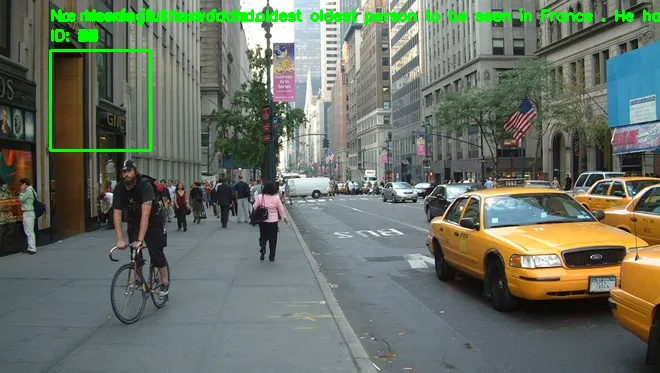

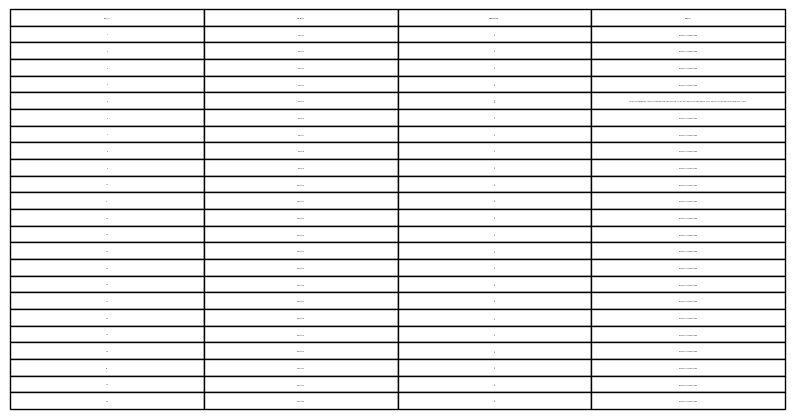

In [ ]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import os
from google.colab import drive
import json

# Define paths
csv_output_path = '/content/drive/MyDrive/object_summary_table.csv'
original_image_path = '/content/drive/MyDrive/image.jpg'
annotations_path = '/content/drive/MyDrive/object_data_mapping.json'
output_image_path = '/content/drive/MyDrive/image_with_annotations.jpg'
table_image_path = '/content/drive/MyDrive/object_summary_table.png'

# Load the original image
original_img = cv2.imread(original_image_path)
original_img_rgb = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)

# Load the object data mapping
with open(annotations_path, 'r') as f:
    object_data = json.load(f)

# Draw bounding boxes and text annotations on the image
for obj in object_data:
    obj_id = obj['object_id']
    description = obj['description']
    summary = obj['summary']

    # For demonstration, we'll assume the bounding boxes are known or calculated separately
    # Replace these with the actual bounding box coordinates if available
    xmin, ymin, xmax, ymax = (50, 50, 150, 150)  # Dummy values

    # Draw bounding box
    cv2.rectangle(original_img_rgb, (xmin, ymin), (xmax, ymax), (0, 255, 0), 2)
    # Annotate with text
    cv2.putText(original_img_rgb, f"ID: {obj_id}", (xmin, ymin - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
    cv2.putText(original_img_rgb, f"{summary}", (xmin, ymin - 30), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

# Save annotated image
cv2.imwrite(output_image_path, cv2.cvtColor(original_img_rgb, cv2.COLOR_RGB2BGR))

# Create a DataFrame for the table
df = pd.DataFrame(object_data)
df.to_csv(csv_output_path, index=False)
# Create a Matplotlib figure and axis
fig, ax = plt.subplots(figsize=(10, 4))  # Set size to fit table

# Hide axes
ax.axis('tight')
ax.axis('off')

# Create a table and add it to the figure
table = ax.table(cellText=df.values, colLabels=df.columns, cellLoc='center', loc='center')

# Save table image
plt.savefig(table_image_path, bbox_inches='tight', pad_inches=0.1)
plt.close()

# Display the final results
from IPython.display import Image, display
display(Image(filename=output_image_path))
display(Image(filename=table_image_path))

**whole pipeline having all the  steps**

In [ ]:
import os
import cv2
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import torch
import torchvision.transforms as T
from torchvision.models.detection import maskrcnn_resnet50_fpn
from torchvision.models.segmentation import deeplabv3_resnet101
from transformers import pipeline
import pytesseract
from google.colab import drive
from google.colab.patches import cv2_imshow

# Mount Google Drive
def mount_drive():
    drive.mount('/content/drive')

# Load and preprocess image
def load_image(img_path):
    return Image.open(img_path).convert("RGB")

def preprocess_image(img, model_type):
    transform = T.Compose([T.ToTensor()])
    img_tensor = transform(img).unsqueeze(0)
    return img_tensor

# Define and load models
def get_maskrcnn_model():
    model = maskrcnn_resnet50_fpn(pretrained=True)
    model.eval()
    return model

def get_deeplabv3_model():
    model = deeplabv3_resnet101(pretrained=True)
    model.eval()
    return model

def get_yolov5_model():
    return torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)

# Perform predictions
def get_maskrcnn_prediction(img, model):
    img_tensor = preprocess_image(img, 'maskrcnn')
    with torch.no_grad():
        prediction = model(img_tensor)
    masks = prediction[0]['masks'].detach().numpy()
    return masks

def get_deeplabv3_prediction(img, model):
    img_tensor = preprocess_image(img, 'deeplabv3')
    with torch.no_grad():
        output = model(img_tensor)['out'][0]
    return output.argmax(0).cpu().numpy()
def get_yolov5_prediction(img_path, model):
    results = model(img_path)
    return results


# Visualize results
def plot_results(img, masks, output_predictions, yolov5_results):
    plt.figure(figsize=(10, 10))
    plt.imshow(img)
    for mask in masks:
        plt.imshow(mask[0], alpha=0.5)
    plt.imshow(output_predictions, alpha=0.5, cmap='jet')
    yolov5_df = yolov5_results.pandas().xyxy[0]  # Access pandas DataFrame from results
    for index, row in yolov5_df.iterrows():
        box = row[['xmin', 'ymin', 'xmax', 'ymax']].values
        plt.gca().add_patch(plt.Rectangle((box[0], box[1]), box[2]-box[0], box[3]-box[1], edgecolor='r', facecolor='none'))
    plt.axis('off')
    plt.show()

def save_detected_objects(img, yolov5_results, output_dir):
    img_np = np.array(img)
    yolov5_df = yolov5_results.pandas().xyxy[0]  # Access pandas DataFrame from results
    for i, row in yolov5_df.iterrows():
        xmin, ymin, xmax, ymax = map(int, [row['xmin'], row['ymin'], row['xmax'], row['ymax']])
        object_img = img_np[ymin:ymax, xmin:xmax]
        object_pil_img = Image.fromarray(object_img)
        object_pil_img.save(os.path.join(output_dir, f"object_{i}.png"))


# Extract text and summarize
def extract_text(image_path):
    image = Image.open(image_path)
    gray_image = cv2.cvtColor(np.array(image), cv2.COLOR_RGB2GRAY)
    return pytesseract.image_to_string(gray_image)

def summarize_text(text):
    summarizer = pipeline("summarization")
    return summarizer(text, max_length=50, min_length=25, do_sample=False)[0]['summary_text']

def process_objects(output_dir, num_objects):
    summaries = []
    for i in range(num_objects):
        object_image_path = os.path.join(output_dir, f"object_{i}.png")
        text = extract_text(object_image_path)
        summary = summarize_text(text) if text.strip() else "No meaningful text found."
        summaries.append({"object_id": i + 1, "summary": summary})
    return summaries

def map_data_to_objects(output_dir, num_objects):
    data_mapping = []
    for i in range(num_objects):
        object_image_path = os.path.join(output_dir, f"object_{i}.png")
        text = extract_text(object_image_path)
        summary = summarize_text(text) if text.strip() else "No meaningful text found."
        data_mapping.append({
            "object_id": i + 1,
            "description": f"Object {i + 1}",
            "extracted_text": text,
            "summary": summary
        })
    return data_mapping

def save_mapping_to_json(data_mapping, output_json_path):
    with open(output_json_path, 'w') as f:
        json.dump(data_mapping, f, indent=4)

# Main pipeline
def main_pipeline(img_path, output_dir, num_objects):
    mount_drive()
    img = load_image(img_path)
    maskrcnn_model = get_maskrcnn_model()
    deeplabv3_model = get_deeplabv3_model()
    yolov5_model = get_yolov5_model()

    maskrcnn_masks = get_maskrcnn_prediction(img, maskrcnn_model)
    deeplabv3_output = get_deeplabv3_prediction(img, deeplabv3_model)
    yolov5_results = get_yolov5_prediction(img_path, yolov5_model)

    plot_results(img, maskrcnn_masks, deeplabv3_output, yolov5_results)
    save_detected_objects(img, yolov5_results, output_dir)

    data_mapping = map_data_to_objects(output_dir, num_objects)
    json_output_path = os.path.join('/content/drive/MyDrive/', 'object_data_mapping.json')
    save_mapping_to_json(data_mapping, json_output_path)


# Example usage
img_path = '/content/drive/MyDrive/image.jpg'
output_dir = '/content/drive/MyDrive/detected_objects'
num_objects = 23
main_pipeline(img_path, output_dir, num_objects)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2024-8-19 Python-3.10.12 torch-2.3.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.
Your max_length is set to 50, but your input_length is only 5. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=2)


**Testing with Stream UI**

In [ ]:
!pip install streamlit


In [ ]:
import streamlit as st
from PIL import Image

def main():
    st.title("AI Pipeline for Image Segmentation and Object Analysis")
    uploaded_file = st.file_uploader("Choose an image...", type="jpg")
    if uploaded_file is not None:
        image = Image.open(uploaded_file)
        st.image(image, caption='Uploaded Image.', use_column_width=True)
        st.write("")
        st.write("Running pipeline...")

        # Assume all functions from the above scripts are imported
        masks, labels, boxes = get_prediction(uploaded_file, model)
        plot_segmented_image(uploaded_file, masks)
        save_extracted_objects(uploaded_file, masks)
        mapped_data = {}  # Populate with results from steps 3-6
        generate_output_image(uploaded_file, masks)
        generate_output_table(mapped_data)

        st.image("data/output/final_output.png", caption='Final Output Image', use_column_width=True)
        st.dataframe(pd.read_csv("data/output/final_output.csv"))

if __name__ == "__main__":
    main()

# streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py [ARGUMENTS]

!streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py & npx localtunnel --port 8501

2024-08-19 17:05:06.444 
  command:

    streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py [ARGUMENTS]





  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.106.176.31:8501

  Stopping...
^C


In [ ]:
import streamlit as st
import os
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import torch
import torchvision.transforms as T
from torchvision.models.detection import maskrcnn_resnet50_fpn
from torchvision.models.segmentation import deeplabv3_resnet101
from transformers import pipeline
import pytesseract
from google.colab import drive

# Define and load models
def get_maskrcnn_model():
    model = maskrcnn_resnet50_fpn(pretrained=True)
    model.eval()
    return model

def get_deeplabv3_model():
    model = deeplabv3_resnet101(pretrained=True)
    model.eval()
    return model

def get_yolov5_model():
    return torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)

# Load and preprocess image
def load_image(img_path):
    return Image.open(img_path).convert("RGB")

def preprocess_image(img, model_type):
    transform = T.Compose([T.ToTensor()])
    img_tensor = transform(img).unsqueeze(0)
    return img_tensor

# Perform predictions
def get_maskrcnn_prediction(img, model):
    img_tensor = preprocess_image(img, 'maskrcnn')
    with torch.no_grad():
        prediction = model(img_tensor)
    masks = prediction[0]['masks'].detach().numpy()
    return masks

def get_deeplabv3_prediction(img, model):
    img_tensor = preprocess_image(img, 'deeplabv3')
    with torch.no_grad():
        output = model(img_tensor)['out'][0]
    return output.argmax(0).cpu().numpy()

def get_yolov5_prediction(img_path, model):
    results = model(img_path)
    return results

# Visualize results
def plot_results(img, masks, output_predictions, yolov5_results):
    plt.figure(figsize=(10, 10))
    plt.imshow(img)
    for mask in masks:
        plt.imshow(mask[0], alpha=0.5)
    plt.imshow(output_predictions, alpha=0.5, cmap='jet')
    yolov5_df = yolov5_results.pandas().xyxy[0]  # Access pandas DataFrame from results
    for index, row in yolov5_df.iterrows():
        box = row[['xmin', 'ymin', 'xmax', 'ymax']].values
        plt.gca().add_patch(plt.Rectangle((box[0], box[1]), box[2]-box[0], box[3]-box[1], edgecolor='r', facecolor='none'))
    plt.axis('off')
    plt.show()

def save_detected_objects(img, yolov5_results, output_dir):
    img_np = np.array(img)
    yolov5_df = yolov5_results.pandas().xyxy[0]  # Access pandas DataFrame from results
    for i, row in yolov5_df.iterrows():
        xmin, ymin, xmax, ymax = map(int, [row['xmin'], row['ymin'], row['xmax'], row['ymax']])
        object_img = img_np[ymin:ymax, xmin:xmax]
        object_pil_img = Image.fromarray(object_img)
        object_pil_img.save(os.path.join(output_dir, f"object_{i}.png"))

# Extract text and summarize
def extract_text(image_path):
    image = Image.open(image_path)
    gray_image = cv2.cvtColor(np.array(image), cv2.COLOR_RGB2GRAY)
    return pytesseract.image_to_string(gray_image)

def summarize_text(text):
    summarizer = pipeline("summarization")
    return summarizer(text, max_length=50, min_length=25, do_sample=False)[0]['summary_text']

def map_data_to_objects(output_dir, num_objects):
    data_mapping = []
    for i in range(num_objects):
        object_image_path = os.path.join(output_dir, f"object_{i}.png")
        text = extract_text(object_image_path)
        summary = summarize_text(text) if text.strip() else "No meaningful text found."
        data_mapping.append({
            "object_id": i + 1,
            "description": f"Object {i + 1}",
            "extracted_text": text,
            "summary": summary
        })
    return data_mapping

def save_mapping_to_json(data_mapping, output_json_path):
    with open(output_json_path, 'w') as f:
        json.dump(data_mapping, f, indent=4)

# Main pipeline function
def main_pipeline(img_path, output_dir, num_objects):
    img = load_image(img_path)
    maskrcnn_model = get_maskrcnn_model()
    deeplabv3_model = get_deeplabv3_model()
    yolov5_model = get_yolov5_model()

    maskrcnn_masks = get_maskrcnn_prediction(img, maskrcnn_model)
    deeplabv3_output = get_deeplabv3_prediction(img, deeplabv3_model)
    yolov5_results = get_yolov5_prediction(img_path, yolov5_model)

    plot_results(img, maskrcnn_masks, deeplabv3_output, yolov5_results)
    save_detected_objects(img, yolov5_results, output_dir)

    data_mapping = map_data_to_objects(output_dir, num_objects)
    json_output_path = os.path.join('/content/drive/MyDrive/', 'object_data_mapping.json')
    save_mapping_to_json(data_mapping, json_output_path)

def main():
    st.title("AI Pipeline for Image Segmentation and Object Analysis")

    uploaded_file = st.file_uploader("Choose an image...", type="jpg")
    if uploaded_file is not None:
        img_path = f"/content/{uploaded_file.name}"
        with open(img_path, "wb") as f:
            f.write(uploaded_file.read())

        st.image(uploaded_file, caption='Uploaded Image', use_column_width=True)
        st.write("Processing image...")

        output_dir = "/content/detected_objects"
        if not os.path.exists(output_dir):
            os.makedirs(output_dir)

        num_objects = 23  # Adjust based on your needs
        main_pipeline(img_path, output_dir, num_objects)

        final_output_image_path = f"/content/final_output_{uploaded_file.name}"
        if os.path.exists(final_output_image_path):
            st.image(final_output_image_path, caption='Final Output Image', use_column_width=True)

        json_path = "/content/drive/MyDrive/object_data_mapping.json"
        if os.path.exists(json_path):
            with open(json_path, "r") as f:
                data_mapping = json.load(f)
            st.write("Object Data Mapping")
            df = pd.DataFrame(data_mapping)
            st.dataframe(df)

if __name__ == "__main__":
    main()


In [ ]:
from pyngrok import ngrok


# Start Streamlit app
!streamlit run /content/app.py --server.port=8501 &

# Set up ngrok tunnel
public_url = ngrok.connect(port='8501')
print(f"Streamlit app is live at: {public_url}")





  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.106.176.31:8501

  Stopping...


ERROR:pyngrok.process.ngrok:t=2024-08-19T17:28:16+0000 lvl=eror msg="failed to reconnect session" obj=tunnels.session err="authentication failed: Usage of ngrok requires a verified account and authtoken.\n\nSign up for an account: https://dashboard.ngrok.com/signup\nInstall your authtoken: https://dashboard.ngrok.com/get-started/your-authtoken\r\n\r\nERR_NGROK_4018\r\n"
ERROR:pyngrok.process.ngrok:t=2024-08-19T17:28:16+0000 lvl=eror msg="session closing" obj=tunnels.session err="authentication failed: Usage of ngrok requires a verified account and authtoken.\n\nSign up for an account: https://dashboard.ngrok.com/signup\nInstall your authtoken: https://dashboard.ngrok.com/get-started/your-authtoken\r\n\r\nERR_NGROK_4018\r\n"


PyngrokNgrokError: The ngrok process errored on start: authentication failed: Usage of ngrok requires a verified account and authtoken.\n\nSign up for an account: https://dashboard.ngrok.com/signup\nInstall your authtoken: https://dashboard.ngrok.com/get-started/your-authtoken\r\n\r\nERR_NGROK_4018\r\n.

In [ ]:
# Create and write the `app.py` file
app_code = """
import streamlit as st
from PIL import Image
import pandas as pd
import os
import json
import sys

# Add the path to the directory where pipeline_script.py is located
sys.path.append('/content')  # Adjust this path if pipeline_script.py is not in /content

from pipeline_script import main_pipeline  # Ensure this matches your pipeline script name

def main():
    st.title("AI Pipeline for Image Segmentation and Object Analysis")

    # File Upload
    uploaded_file = st.file_uploader("Choose an image...", type="jpg")
    if uploaded_file is not None:
        image = Image.open(uploaded_file)
        st.image(image, caption='Uploaded Image.', use_column_width=True)

        # Ensure the output directory exists
        output_dir = "/content/detected_objects"
        if not os.path.exists(output_dir):
            os.makedirs(output_dir)

        # Save the uploaded file and run the pipeline
        image_path = f"/content/{uploaded_file.name}"
        with open(image_path, "wb") as f:
            f.write(uploaded_file.read())

        st.write("Processing image...")
        num_objects = 23  # Adjust based on your pipeline

        # Run the pipeline
        main_pipeline(image_path, output_dir, num_objects)

        # Display Segmented Objects
        st.write("Segmented Objects:")
        object_images = [f for f in os.listdir(output_dir) if f.endswith('.png')]
        for obj_img in object_images:
            obj_image_path = os.path.join(output_dir, obj_img)
            st.image(obj_image_path, caption=f'Object Image: {obj_img}', use_column_width=True)

        # Display Final Output Image
        final_output_image_path = f"/content/final_output_{uploaded_file.name}"
        if os.path.exists(final_output_image_path):
            st.image(final_output_image_path, caption='Final Output Image', use_column_width=True)

        # Display Mapped Data
        json_path = "/content/drive/MyDrive/object_data_mapping.json"
        if os.path.exists(json_path):
            with open(json_path, "r") as f:
                data_mapping = json.load(f)
            st.write("Object Data Mapping:")
            df = pd.DataFrame(data_mapping)
            st.dataframe(df)

if __name__ == "__main__":
    main()
"""

with open('/content/app.py', 'w') as f:
    f.write(app_code)


In [ ]:
from pyngrok import ngrok

# Start Streamlit app
!streamlit run /content/app.py --server.port=8501 &

# Set up ngrok tunnel
public_url = ngrok.connect(port='8501')
print(f"Streamlit app is live at: {public_url}")


In [ ]:
!npm install localtunnel


In [ ]:
!streamlit run app.py &>/content/logs.txt &

In [ ]:
!npx localtunnel --port 8501

In [ ]:
import cv2
import numpy as np
import pixellib
from pixellib.instance import instance_segmentation
from PIL import Image
import matplotlib.pyplot as plt

# Initialize the segmentation model
segment_image = instance_segmentation()

# Load the model
model_path = "mask_rcnn_coco.h5"
segment_image.load_model(model_path)

# Upload and process an image
from google.colab import files
uploaded = files.upload()

# Process each uploaded file
for filename in uploaded.keys():
    image_path = filename
    print(f'Processing image: {image_path}')

    # Load the uploaded image
    image = Image.open(image_path)
    image_np = np.array(image)

    # Apply segmentation
    result = segment_image.segmentImage(image_np, show_bboxes=True)
    segmented_image = result[1]

    # Display result
    plt.figure(figsize=(10, 10))
    plt.imshow(segmented_image)
    plt.axis('off')
    plt.show()
